## Importing Libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training Image Preprocessing

In [2]:
training_set=tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


2024-06-29 21:07:27.278725: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-06-29 21:07:27.278749: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-06-29 21:07:27.278756: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-06-29 21:07:27.278993: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-06-29 21:07:27.279006: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


### Validation Image Preprocessing

In [3]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [4]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [5]:
for x,y in training_set:
    print (x,x.shape)
    print (y,y.shape)
    break

tf.Tensor(
[[[[162.75 151.75 147.75]
   [158.5  147.5  143.5 ]
   [157.   146.   142.  ]
   ...
   [179.   171.   168.  ]
   [181.   173.   170.  ]
   [183.25 175.25 172.25]]

  [[154.5  143.5  139.5 ]
   [156.75 145.75 141.75]
   [159.25 148.25 144.25]
   ...
   [180.   172.   169.  ]
   [182.25 174.25 171.25]
   [179.5  171.5  168.5 ]]

  [[158.75 147.75 143.75]
   [160.   149.   145.  ]
   [160.75 149.75 145.75]
   ...
   [182.75 174.75 171.75]
   [185.   177.   174.  ]
   [180.75 172.75 169.75]]

  ...

  [[188.5  180.5  178.5 ]
   [186.25 178.25 176.25]
   [187.25 179.25 177.25]
   ...
   [197.   192.   189.  ]
   [192.25 187.25 184.25]
   [186.75 181.75 178.75]]

  [[188.25 180.25 178.25]
   [189.25 181.25 179.25]
   [175.75 167.75 165.75]
   ...
   [195.25 190.25 187.25]
   [190.25 185.25 182.25]
   [190.75 185.75 182.75]]

  [[179.75 171.75 169.75]
   [177.75 169.75 167.75]
   [180.   172.   170.  ]
   ...
   [194.5  189.5  186.5 ]
   [191.25 186.25 183.25]
   [189.25 184.25 18

### Building Model

In [6]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [7]:
model = Sequential()

In [8]:
## Building Convolutional Layer

In [9]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [11]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [12]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [13]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [14]:
model.add(Dropout(0.25))

In [15]:
model.add(Flatten())

In [16]:
model.add(Dense(units=1500,activation='relu'))

In [17]:
model.add(Dropout(0.4))

In [18]:
# Output Layer
model.add(Dense(units=38,activation='softmax'))

### Compiling Model

In [19]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 15, 15, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 13, 13, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

### Model Training

In [21]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10


2024-06-29 21:07:29.499066: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


2197/2197 ━━━━━━━━━━━━━━━━━━━━ 353s 158ms/step - accuracy: 0.4249 - loss: 2.0259 - val_accuracy: 0.8080 - val_loss: 0.5992
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 377s 172ms/step - accuracy: 0.8462 - loss: 0.4888 - val_accuracy: 0.8905 - val_loss: 0.3293
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 376s 171ms/step - accuracy: 0.9051 - loss: 0.2903 - val_accuracy: 0.9429 - val_loss: 0.1771
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 357s 163ms/step - accuracy: 0.9373 - loss: 0.1921 - val_accuracy: 0.9427 - val_loss: 0.1773
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 371s 169ms/step - accuracy: 0.9531 - loss: 0.1436 - val_accuracy: 0.9413 - val_loss: 0.1821
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 368s 168ms/step - accuracy: 0.9638 - loss: 0.1114 - val_accuracy: 0.9649 - val_loss: 0.1125
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 377s 171ms/step - accuracy: 0.9690 - loss: 0.0953 - val_accuracy: 0.9558 - val_loss: 0.1371
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 377s 171ms/step - accuracy: 0.9

## Model Evaluation

In [22]:
# Model Evaluation on training set
train_loss,train_accuracy=model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9870 - loss: 0.0464


In [23]:
print(train_loss,train_accuracy)

0.046779096126556396 0.9874244332313538


In [24]:
# Model on validation set
val_loss,val_accuracy=model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9643 - loss: 0.1348


In [25]:
print(val_loss,val_accuracy)

0.1379309594631195 0.9634076952934265


### Saving Model

In [27]:
model.save('trained_model.keras')

In [28]:
training_history.history

{'accuracy': [0.6252934336662292,
  0.8686251044273376,
  0.9149868488311768,
  0.9427270889282227,
  0.9560424089431763,
  0.965772807598114,
  0.9711785912513733,
  0.9765416979789734,
  0.9800839424133301,
  0.9824738502502441],
 'loss': [1.2680861949920654,
  0.41429403424263,
  0.26128238439559937,
  0.17581689357757568,
  0.13500650227069855,
  0.10504495352506638,
  0.08877775073051453,
  0.07107429206371307,
  0.06214281916618347,
  0.054814379662275314],
 'val_accuracy': [0.8079899549484253,
  0.8905076384544373,
  0.9428636431694031,
  0.9427498579025269,
  0.9412702322006226,
  0.9649442434310913,
  0.9557819366455078,
  0.9669929146766663,
  0.9732528924942017,
  0.9634076952934265],
 'val_loss': [0.5992444753646851,
  0.32926657795906067,
  0.17708857357501984,
  0.17732961475849152,
  0.18210777640342712,
  0.11248472332954407,
  0.1370614916086197,
  0.11194339394569397,
  0.09071697294712067,
  0.1379309743642807]}

In [29]:
# Recording history in json
import json
with open('training_history.json','w') as f:
    json.dump(training_history.history,f)

### Accuracy Visualization

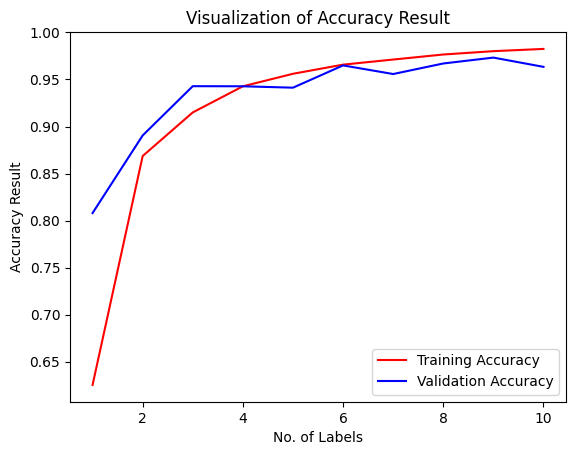

In [35]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Labels')
plt.ylabel('Accuracy Result')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

### Evaluating on some other metrics of evaluation

In [36]:
class_name=validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [37]:
# Using validation set as test set
test_set=tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    data_format=None,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [39]:
y_pred=model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 18s 33ms/step


(array([[9.9999964e-01, 2.9982704e-07, 5.4375832e-10, ..., 2.6014387e-17,
         1.4926020e-13, 3.9403041e-14],
        [1.0000000e+00, 7.6204887e-10, 6.6005764e-12, ..., 3.2528210e-24,
         5.7576014e-18, 1.1520930e-19],
        [1.0000000e+00, 1.7156755e-10, 3.1810546e-12, ..., 1.0401263e-20,
         1.6539172e-16, 2.8152440e-16],
        ...,
        [1.6673821e-12, 9.6333174e-16, 3.0520871e-11, ..., 6.6848523e-13,
         3.1376662e-13, 1.0000000e+00],
        [2.7691816e-13, 1.3887854e-16, 9.7053745e-12, ..., 1.4394720e-12,
         3.5805536e-13, 1.0000000e+00],
        [3.9405155e-14, 1.6878443e-16, 2.0075183e-15, ..., 2.6052134e-17,
         9.5546322e-16, 1.0000000e+00]], dtype=float32),
 (17572, 38))

In [40]:
predicted_categories=tf.argmax(y_pred,axis=1)
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [41]:
true_categories=tf.concat([y for x,y in test_set],axis=0)
true_categories

2024-06-29 23:40:07.359434: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [42]:
y_true=tf.argmax(true_categories,axis=1)
y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [45]:
from sklearn.metrics import classification_report,confusion_matrix

In [44]:
print(classification_report(y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.96      0.96      0.96       504
                                 Apple___Black_rot       0.95      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.98      0.97       440
                                   Apple___healthy       0.98      0.98      0.98       502
                               Blueberry___healthy       0.98      0.98      0.98       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.99      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.94      0.91      0.93       410
                       Corn_(maize)___Common_rust_       1.00      0.98      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.91      0.98      0.

In [46]:
cm=confusion_matrix(y_true,predicted_categories)
cm

array([[485,  10,   2, ...,   0,   0,   0],
       [  0, 496,   0, ...,   0,   0,   0],
       [  0,   0, 430, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 481,   0,   0],
       [  0,   0,   0, ...,   0, 445,   0],
       [  0,   0,   1, ...,   0,   0, 476]])

In [47]:
cm.shape

(38, 38)

### Confusion Matrix Visualization

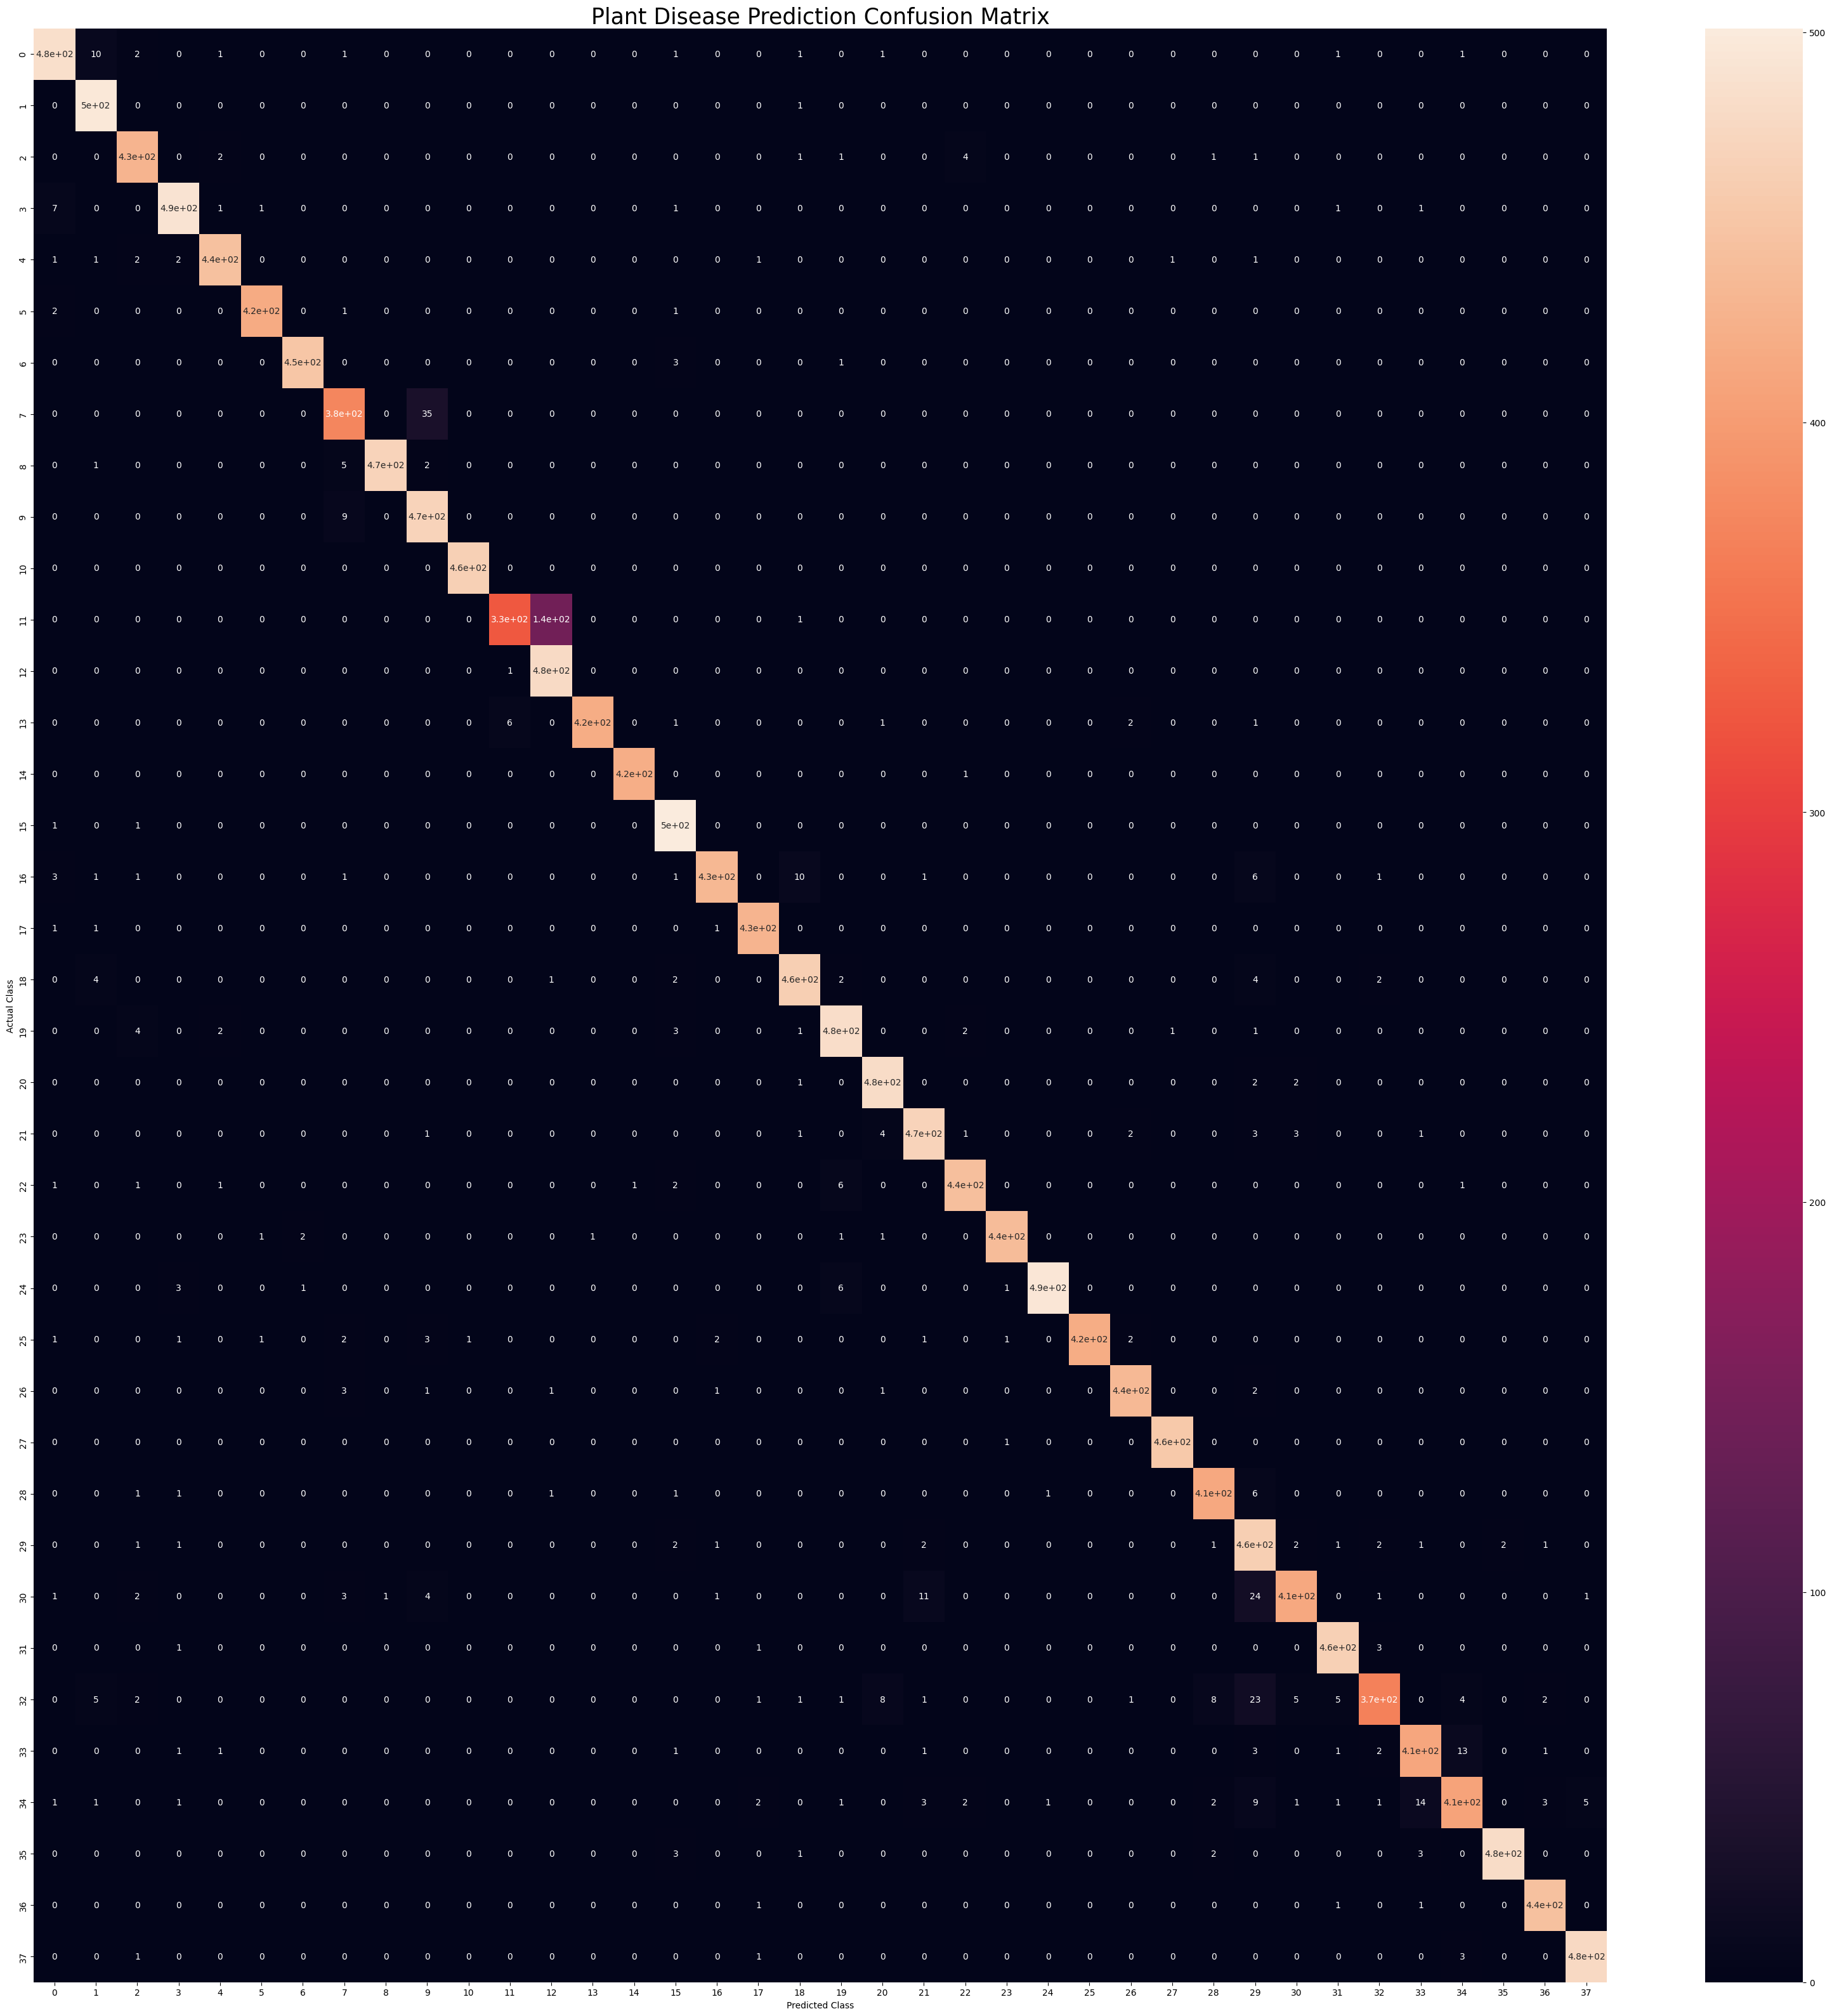

In [61]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.title('Plant Disease Prediction Confusion Matrix',fontsize=25)
plt.show()